tf.Tensor(
[ 0.         0.5263158  1.0526316  1.5789474  2.1052632  2.631579
  3.1578948  3.6842108  4.2105265  4.736842   5.263158   5.789474
  6.3157897  6.8421054  7.3684216  7.8947372  8.421053   8.947369
  9.473684  10.       ], shape=(20,), dtype=float32)
tf.Tensor(
[-12.20244     -5.32955     -6.0748167   -7.0224733   -6.1335545
  -4.0675054   -0.35070002   0.6461116    1.515267     2.7694383
   4.537489     5.9383698    8.25066      9.853376    12.470416
  15.901402    17.822475    16.799154    17.781675    20.74665   ], shape=(20,), dtype=float32)
epoch=0: loss=37.226837158203125
epoch=100: loss=12.824580192565918
epoch=200: loss=5.855210304260254
epoch=300: loss=3.433419704437256
epoch=400: loss=2.5918679237365723
epoch=500: loss=2.299438953399658
epoch=600: loss=2.197822093963623
epoch=700: loss=2.162511110305786
epoch=800: loss=2.150240898132324
epoch=900: loss=2.14597749710083
w=3.1359. b=-10.9725, loss=2.1445038318634033


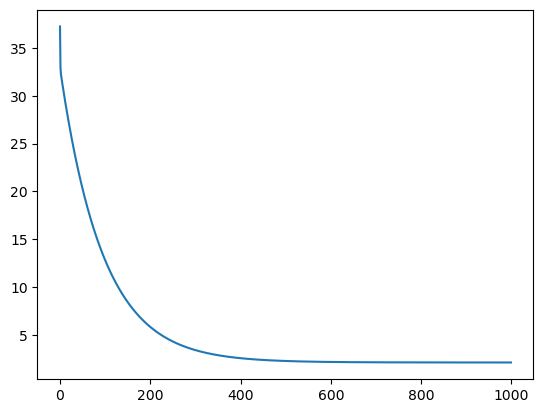

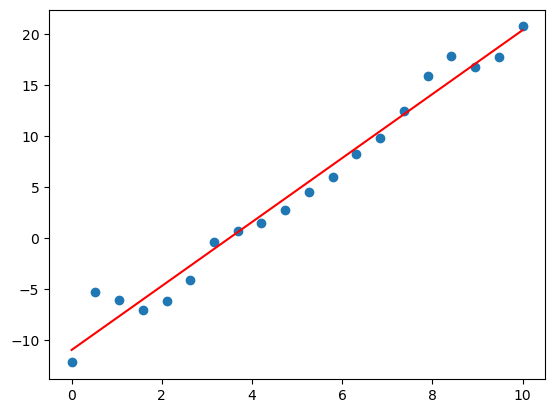

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
     y = x*w + b
     return MSE(y, t) # tf.reduce_mean(tf.square(y - t))

EPOCH = 1000
train_size = 20

# create the train data
tf.random.set_seed(1) # np.random.seed(1)
x = tf.linspace(0.0, 10.0, num=train_size) #np.linspace(0.0, 10.0, num=20)
w_true, b_true = 3, -10  # truth, line parameters
t = x*w_true + b_true + tf.random.normal([train_size], mean=0.0, stddev=2.0)
print(x)
print(t)
# train parameters
w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

opt = tf.keras.optimizers.SGD(learning_rate=0.01)

loss_list = [ ]
for epoch in range(EPOCH):   
    opt.minimize(mse_loss, var_list= [w, b])
     
    loss = mse_loss().numpy()
    loss_list.append(loss)
    if not epoch%100:
        print("epoch={}: loss={}".format(epoch, loss))

print("w={:>.4f}. b={:>.4f}, loss={}".format(w.numpy(), b.numpy(), loss))

plt.plot(loss_list)
plt.show()

plt.scatter(x, t.numpy())  # train data plot

w_pred, b_pred = w.numpy(), b.numpy() # predicted, line parameters
t_pred= x*w_pred + b_pred 
plt.plot(x, t_pred, 'r-')
plt.show()


epoch=0: loss=544.3563232421875
epoch=100: loss=4.419684410095215
epoch=200: loss=2.8330249786376953
epoch=300: loss=2.6601357460021973
epoch=400: loss=2.5432896614074707
epoch=500: loss=2.446033000946045
epoch=600: loss=2.3645241260528564
epoch=700: loss=2.2961983680725098
epoch=800: loss=2.2389321327209473
epoch=900: loss=2.1909255981445312
a=3.0130. b=2.1439, c=0.8757, loss=2.1510555744171143


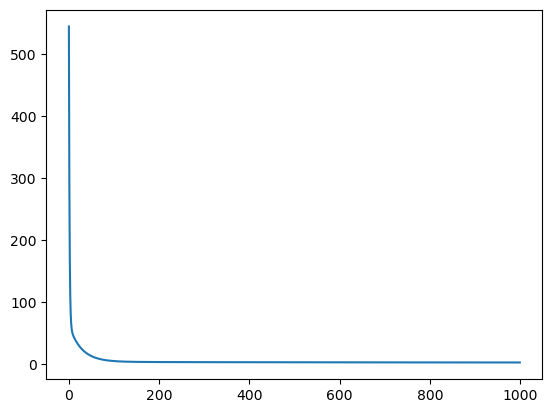

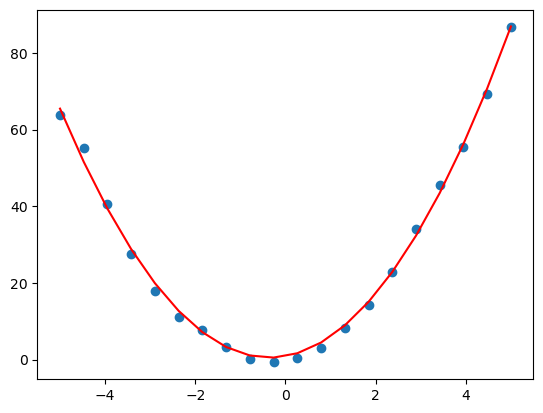

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
     y = a*x**2 + b*x+c
##     y = a*tf.pow(x, 2) + b**x + c
     return MSE(y, t) # tf.reduce_mean(tf.square(y - t))

EPOCH = 1000
train_size = 20

# create the train data
tf.random.set_seed(1) # np.random.seed(1)
x = tf.linspace(-5.0, 5.0, num=train_size)

a_true = tf.Variable(3.0)
b_true = tf.Variable(2.0)
c_true = tf.Variable(1.0)
t = a_true*tf.pow(x, 2) + b_true*x+c_true
t += tf.random.normal([train_size], mean=0.0, stddev = 2)
#t = tf.add(t, np.random.normal(0, 2.0, train_size))

a = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))
c = tf.Variable(tf.random.normal([]))
                
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
#opt = tf.keras.optimizers.Adam(learning_rate=0.01)
##opt = tf.keras.optimizers.RMSprop(0.01)

loss_list = [ ]
for epoch in range(EPOCH):   
    opt.minimize(mse_loss, var_list= [a, b, c])
     
    loss = mse_loss().numpy()
    loss_list.append(loss)

    if not epoch%100:
        print("epoch={}: loss={}".format(epoch, loss))      

print("a={:>.4f}. b={:>.4f}, c={:>.4f}, loss={}".format(
       a.numpy(), b.numpy(), c.numpy(),loss))

plt.plot(loss_list)
plt.show()

plt.scatter(x, t.numpy())

t_pred = a*tf.pow(x, 2) + b*x + c # parabola curve
plt.plot(x, t_pred, 'red')
plt.show()

epoch=0: loss=116886.984375
epoch=100: loss=21676.00390625
epoch=200: loss=6637.5126953125
epoch=300: loss=2749.12060546875
epoch=400: loss=1326.5997314453125
epoch=500: loss=889.1759033203125
epoch=600: loss=774.9925537109375
epoch=700: loss=743.7783203125
epoch=800: loss=728.9998168945312
epoch=900: loss=716.5155029296875
epoch=1000: loss=704.068359375
epoch=1100: loss=691.4616088867188
epoch=1200: loss=678.7676391601562
epoch=1300: loss=666.0801391601562
epoch=1400: loss=653.4861450195312
epoch=1500: loss=641.06494140625
epoch=1600: loss=628.8853759765625
epoch=1700: loss=617.0072021484375
epoch=1800: loss=605.4810791015625
epoch=1900: loss=594.3463134765625
epoch=2000: loss=583.6337280273438
epoch=2100: loss=573.364013671875
epoch=2200: loss=563.5484619140625
epoch=2300: loss=554.1884765625
epoch=2400: loss=545.2796020507812
epoch=2500: loss=536.8074340820312
epoch=2600: loss=528.7533569335938
epoch=2700: loss=521.0924072265625
epoch=2800: loss=513.7960205078125
epoch=2900: loss=50

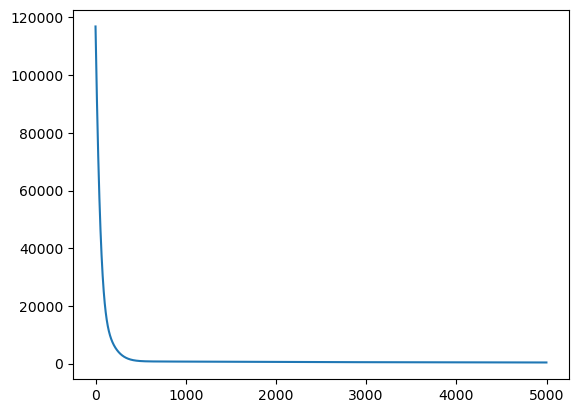

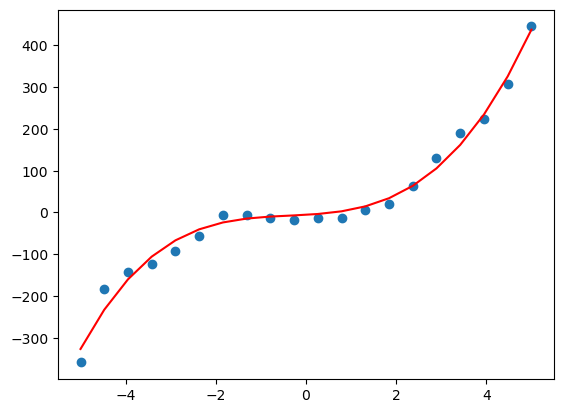

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()
def mse_loss():
     y = tf.zeros_like(x)
     for i in range(W.shape[0]):
          y += W[i]*(x**(i+1))
     y += b # bias
     return MSE(y, t) # tf.reduce_mean(tf.square(y - t))

EPOCH = 5000
train_size = 20

# create the train data
tf.random.set_seed(1)
x = tf.linspace(-5.0, 5.0, num=train_size)

w_true = tf.Variable([1.0, 2.0, 3.0])
b_true = tf.Variable(4.0)    
t = w_true[2]*x**3 + w_true[1]*x**2 + w_true[0]*x + b_true      
t += tf.random.normal([train_size], mean=0.0, stddev = 30)

# train variables
n = 4 # n-th polynomial curve
W = tf.Variable(tf.random.normal([n]))
b = tf.Variable(tf.random.normal([])) 

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
##opt = tf.keras.optimizers.RMSprop(0.01)

loss_list = [ ]
for epoch in range(EPOCH): 
    opt.minimize(mse_loss, var_list= [W, b])
     
    loss = mse_loss().numpy()
    loss_list.append(loss)

    if not epoch%100:
        print("epoch={}: loss={}".format(epoch, loss))
        
print("W={}. b={}, loss={}".format(W.numpy(), b.numpy(),loss))
plt.plot(loss_list)
plt.show()

plt.scatter(x, t.numpy())

# polynomial curve
t_pred = tf.zeros_like(x)
for i in range(W.shape[0]): # n = W.shape[0] 
     t_pred += W[i]*(x**(i+1))
t_pred += b # bias
     
plt.plot(x, t_pred, 'red')
plt.show()
